In [1]:
!pip install -q transformers[torch]
!pip install -U -q datasets
!pip install -q sentencepiece pynvml rouge

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cubinlinker, which is not installed.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 23.8.0 requires ptxcompiler, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 23.8.0 requires cuda-python<12.0a0,>=11.7.1, but you have cuda-python 12.3.0 which is incompatible.
cudf 23.8.0 requires pandas<1.6.0dev0,>=1.3, but you have pandas 2.1.4 which is incompatible.
cudf 23.8.0 requires protobuf<5,>=4.21, but you have protobuf 3.20.3 which is incompatible.
cuml 23.8.0 requires dask==2023.7.1, but you have dask 2024.1.0 which is incompatible.
cuml 23.8.0 requires distributed==2023.7.1, but you have distributed 2024.1.0 which is incompatible.
dask-cuda 23.8.0 require

In [2]:
import gc
def report_gpu():
    print(torch.cuda.list_gpu_processes())
    gc.collect()
    torch.cuda.empty_cache()

In [3]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
from datasets import load_dataset

dataset = load_dataset("Someman/news_nepali")
dataset

Generating train split:   0%|          | 0/15580 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1732 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['article', 'article_summary'],
        num_rows: 15580
    })
    test: Dataset({
        features: ['article', 'article_summary'],
        num_rows: 1732
    })
})

In [5]:
print("Article")
print(dataset["train"][0]["article"])
print("Summary")
print(dataset["train"][0]["article_summary"])

Article
काठमाडौं, चैत ११ : सत्तारुढ नेकपा (माओवादी केन्द्र)ले चैत ११ गते (सोमबार)भित्र मन्त्रिपरिषद्लाई पूर्णता दिने निर्णय गरेको छ ।शनिबार दिउँसो पेरिसडाँडामा बसेको पार्टी पदाधिकारी बैठकले उक्त निर्णय गरेको हो । माओवादी केन्द्रको केन्द्रीय कार्यालय। पार्टीले सोमबारसम्म मन्त्रिपरिषद् विस्तार गर्ने औपचारिक निर्णय गरेको सचिव देवेन्द्र पौडेलले जानकारी दिए । सचिव पौडेलले प्रदेश सरकारलाई सङ्घीय सरकारको नीति तथा कार्यक्रमसँग जोडेर गतिशिल बनाउनुपर्नेमा नेताहरुले जोड दिएको जानकारी दिँदै पार्टी नेताहरुले प्रधानमन्त्री पुष्पकमल दाहालको पनि ध्यानाकर्षण गराए । पार्टी र सरकारबीचको खाडल घटाउन पार्टी अध्यक्ष डा.
Summary
शनिबार दिउँसो पेरिसडाँडामा बसेको पार्टी पदाधिकारी बैठकले यस्तो निर्णय गरेको हो । पार्टीले सोमबारसम्म मन्त्रिपरिषद् विस्तार गर्ने औपचारिक निर्णय गरेको सचिव देवेन्द्र पौडेलले जानकारी दिए ।


In [6]:
def add_prefix(text_dict):
    input_text = text_dict["article"]
    prefix = "संक्षेप गर्नुहोस्: "
    text_dict["article"] = prefix + input_text
    return text_dict

In [7]:
dataset["train"] = dataset["train"].map(add_prefix)


Map:   0%|          | 0/15580 [00:00<?, ? examples/s]

In [8]:
dataset["train"][0]["article"]

'संक्षेप गर्नुहोस्: काठमाडौं, चैत ११ : सत्तारुढ नेकपा (माओवादी केन्द्र)ले चैत ११ गते (सोमबार)भित्र मन्त्रिपरिषद्लाई पूर्णता दिने निर्णय गरेको छ ।शनिबार दिउँसो पेरिसडाँडामा बसेको पार्टी पदाधिकारी बैठकले उक्त निर्णय गरेको हो । माओवादी केन्द्रको केन्द्रीय कार्यालय। पार्टीले सोमबारसम्म मन्त्रिपरिषद् विस्तार गर्ने औपचारिक निर्णय गरेको सचिव देवेन्द्र पौडेलले जानकारी दिए । सचिव पौडेलले प्रदेश सरकारलाई सङ्घीय सरकारको नीति तथा कार्यक्रमसँग जोडेर गतिशिल बनाउनुपर्नेमा नेताहरुले जोड दिएको जानकारी दिँदै पार्टी नेताहरुले प्रधानमन्त्री पुष्पकमल दाहालको पनि ध्यानाकर्षण गराए । पार्टी र सरकारबीचको खाडल घटाउन पार्टी अध्यक्ष डा.\r'

In [9]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "Angeldahal404/net5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)

tokenizer_config.json:   0%|          | 0.00/833 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/582k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.51M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/416 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/842 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/909M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

In [10]:
tokenized_data = tokenizer.encode_plus(dataset["train"][0]["article"], max_length=1024, truncation=True, padding=True, return_tensors="pt", return_attention_mask=True)
tokenized_data

{'input_ids': tensor([[ 1813, 15811,  2050,  3225, 15512,   267,   259, 10174,   261,  2737,
         16645,   259, 11467,   259,   267,   259, 12522,  7169,  4105,   259,
          8778,  3610,   274,  1097,  5299,  7797,   259,  8726,   271,  1024,
          2737, 16645,   259, 11467,  1188,  1198,   274,  7440,  1408,  4735,
           271, 10481, 11955,  1830,  5258, 11862,  8620,  2146,   259,  5214,
          1057,  2641,   757,  4864,  1873,  1295,  1673,  1967,  1505,   259,
           378,  5273,  1830,  4735,  2641, 12789,  7440,  5966, 14049,  4619,
         14223,  9963,  5943,  1967,   259,  6428,   259, 16684, 14004,  3503,
          2319, 11559,  1464,  6335,  4864,  1873,  1295,  1673,  1967,  1118,
           259,   378,  2466,  5299,  7797,   259,  8726,  1066,   259,  8726,
          3007,  3428,  4601,   378,   259,  6428,  1024,  3221,  1408,  4735,
          6594, 11955,  1830,  5258, 11862,  8620,   259, 12672,  5987,  3225,
           757,  8193, 15317, 16452,  

In [11]:
from rouge import Rouge
import sys

def calculate_rouge_batch(references, hypotheses, batch=50):

    sys.setrecursionlimit(5000)

    if len(hypotheses) < batch:
        batch = len(hypotheses)

    rouge = Rouge()
    best_rouge_scores = rouge.get_scores(hypotheses[:batch], references[:batch], avg=True)

    for i in range(len(references)//batch):
        try:
            start_idx = i * batch
            end_idx = start_idx + batch
            rouge_scores = rouge.get_scores(hypotheses[start_idx:end_idx], references[start_idx:end_idx], avg=True)
        except:
            # Handle the last batch with the remaining examples
            start_idx = i * batch
            end_idx = len(hypotheses)
            rouge_scores = rouge.get_scores(hypotheses[start_idx:end_idx], references[start_idx:end_idx], avg=True)

        if (
            rouge_scores["rouge-2"]["f"] > best_rouge_scores["rouge-2"]["f"]
            and rouge_scores["rouge-1"]["f"] > best_rouge_scores["rouge-1"]["f"]
        ):
            best_rouge_scores = rouge_scores

    return best_rouge_scores

In [12]:
from tqdm import tqdm
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i : i + n]
def evaluate_summaries(dataset, model, tokenizer, batch_size=16, device=device, column_text="article", column_summary="highlights"):
  score = {}
  hypothesis_texts = []
  reference_texts = []

  article_batches = list(chunks(dataset[column_text], batch_size))
  target_batches = list(chunks(dataset[column_summary], batch_size))

  for article_batch, target_batch in tqdm(zip(article_batches, target_batches),total=len(article_batches)):

    dct = tokenizer.batch_encode_plus(article_batch, max_length=2048, truncation=True, padding=True, return_tensors="pt")
    summaries = model.generate(input_ids=dct["input_ids"].to(device), length_penalty=0.8, attention_mask=dct["attention_mask"].to(device), num_beams=8,max_length=256)
    dec = [tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=True) for g in summaries]
    dec = [d.replace("<n>", " ") for d in dec]

    hypothesis_texts += target_batch
    reference_texts += dec

  score = calculate_rouge_batch(reference_texts, hypothesis_texts)

  return score

In [13]:
score = evaluate_summaries(
 dataset["test"][:20],
 model,
 tokenizer,
 batch_size=4,
 column_text="article",
 column_summary="article_summary",
)

100%|██████████| 5/5 [00:41<00:00,  8.23s/it]


In [14]:
import pandas as pd

rouge_dict = dict((rouge, score[rouge]["f"]) for rouge, value in score.items())
pd.DataFrame.from_dict(rouge_dict, orient="index", columns=["net5"])

,net5
rouge-1,0.080193
rouge-2,0.014419
rouge-l,0.075062


In [15]:
rouge_dict

{'rouge-1': 0.0801933640906375,
 'rouge-2': 0.014418908819675455,
 'rouge-l': 0.07506178514326908}

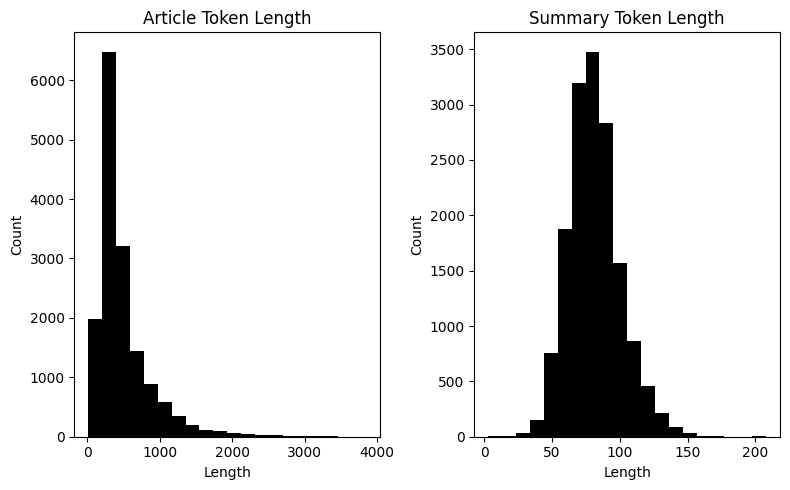

In [16]:
import matplotlib.pyplot as plt

article_lengths = [len(tokenizer.encode(s)) for s in dataset["train"]["article"]]
summary_lengths = [len(tokenizer.encode(s)) for s in dataset["train"]["article_summary"]]

fig, axes = plt.subplots(1, 2, figsize=(8, 5))
axes[0].hist(article_lengths, bins=20, color="black")
axes[0].set_title("Article Token Length")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Count")
axes[1].hist(summary_lengths, bins=20, color="black")
axes[1].set_title("Summary Token Length")
axes[1].set_xlabel("Length")
axes[1].set_ylabel("Count")
plt.tight_layout()

In [17]:
def convert_examples_to_features(example_batch):
    input_encodings = tokenizer.batch_encode_plus(example_batch["article"], pad_to_max_length=True, max_length=1024, truncation=True)
    target_encodings = tokenizer.batch_encode_plus(example_batch["article_summary"], pad_to_max_length=True, max_length=128, truncation=True)

    return {
        "input_ids": input_encodings["input_ids"],
        "attention_mask": input_encodings["attention_mask"],
        "labels": target_encodings["input_ids"]
    }

dataset_pt = dataset.map(convert_examples_to_features, batched=True)
columns = ["input_ids", "labels", "attention_mask"]
dataset_pt.set_format(type="torch", columns=columns)

Map:   0%|          | 0/15580 [00:00<?, ? examples/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Map:   0%|          | 0/1732 [00:00<?, ? examples/s]

In [18]:
def trim_batch(input_ids, pad_token_id, attention_mask=None):
    # If any token in column is not a padding token, we keep it
    keep_column_mask = input_ids.ne(pad_token_id).any(dim=0)
    if attention_mask is None:
        return input_ids[:, keep_column_mask]
    else:
        return (input_ids[:, keep_column_mask], attention_mask[:, keep_column_mask])

In [29]:
from transformers import MT5Config

model_name_base = "google/mt5-base"
config = MT5Config.from_pretrained(model_name_base)
decoder_start_token_id = config.decoder_start_token_id

print(decoder_start_token_id)


0


In [26]:
from transformers.models.bart.modeling_bart import shift_tokens_right

def seq2seq_data_collator(batch):
    pad_token_id = model.config.pad_token_id
    input_ids = torch.stack([example["input_ids"] for example in batch])
    attention_mask = torch.stack([example["attention_mask"] for example in batch])
    input_ids, attention_mask = trim_batch(input_ids, pad_token_id, attention_mask=attention_mask)
    labels = torch.stack([example["labels"] for example in batch])
    labels = trim_batch(labels, pad_token_id)
    decoder_input_ids = shift_tokens_right(labels, model.config.pad_token_id, decoder_start_token_id)
    labels[labels[:, :] == 0] = -100

    return {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "decoder_input_ids": decoder_input_ids,
            "labels": labels
           }

In [36]:
report_gpu()

GPU:0
process       3383 uses     5854.000 MB GPU memory


In [30]:
model_name = "Angeldahal404/net5-base"

In [32]:
from transformers import TrainingArguments, Trainer

def model_init():
    return (AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device))

training_args = TrainingArguments(
    output_dir='results',
    num_train_epochs=5,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    warmup_steps=500,
    weight_decay=0.01,
    no_cuda=False,
    evaluation_strategy='steps',
    eval_steps=500,
    save_steps=20000
)

trainer = Trainer(
    model_init=model_init,
    args=training_args,
    data_collator=seq2seq_data_collator,
    train_dataset=dataset_pt['train'],
    eval_dataset=dataset_pt['test']
)

In [33]:
trainer.train()

Step,Training Loss,Validation Loss
500,5.548700,0.909472
1000,1.094000,0.866659
1500,1.033100,0.808615
2000,0.973600,0.787836
2500,0.942100,0.762729
3000,0.911100,0.754206
3500,0.885400,0.737966
4000,0.889100,0.719910
4500,0.889200,0.709102
5000,0.844000,0.709348


TrainOutput(global_step=38950, training_loss=0.7440886409108232, metrics={'train_runtime': 15961.5066, 'train_samples_per_second': 4.88, 'train_steps_per_second': 2.44, 'total_flos': 5.964766692146381e+16, 'train_loss': 0.7440886409108232, 'epoch': 5.0})

In [37]:
score = evaluate_summaries(
      dataset["test"][:10],
      model,
      tokenizer,
      batch_size=2,
      column_text="article",
      column_summary="article_summary")

100%|██████████| 5/5 [00:11<00:00,  2.34s/it]


In [38]:
score

{'rouge-1': {'r': 0.23833333333333337,
  'p': 0.03582244822454524,
  'f': 0.062060560851927446},
 'rouge-2': {'r': 0.05833333333333333,
  'p': 0.007289002557544758,
  'f': 0.012955465194536882},
 'rouge-l': {'r': 0.21333333333333337,
  'p': 0.03288127175395701,
  'f': 0.056797402957190615}}

In [39]:
trainer.save_model("./models/nepali-news")
tokenizer.save_pretrained("./models/nepali-news")

('./models/nepali-news/tokenizer_config.json',
 './models/nepali-news/special_tokens_map.json',
 './models/nepali-news/spiece.model',
 './models/nepali-news/added_tokens.json',
 './models/nepali-news/tokenizer.json')

In [40]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "./models/nepali-news"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = (AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device))

In [41]:
text = "काठमाडौँ । हाल देशको पूर्वी तथा मध्य भू–भागमा मनसुनी प्रणालीको प्रभाव रहेको छ भने बाँकी भू–भागमा स्थानीय वायु र पश्चिमी वायुको आंशिक प्रभाव रहेको छ । यसका कारण हाल गण्डकी प्रदेशका थोरै स्थानमा र कर्णाली प्रदेशका एक–दुई स्थानमा मेघगर्जनरचट्याङसहित हल्कादेखि मध्यम वर्षा भइरहेको जल तथा मौसम विज्ञान विभाग, मौसम पूर्वानुमान महाशाखाले जनाएको छ । \
महाशाखका मौमसविद् रोजल लामिछानेका अनुसार पछिल्लो तीन घन्टामा गण्डकी प्रदेशका थोरै स्थान, बागमती प्रदेशका एक–दुई स्थानमा हल्कादेखि मध्यम वर्षा भइरहेको छ । काठमाडौँ उपत्यकासहित बागमती प्रदेशमा रातिको समयमा वर्षाको सम्भावना रहेको छ । यस्तै कोशी प्रदेश, मधेश प्रदेश र देशका पहाडी भू–भागमा बदली रहनुका साथै हल्का वर्षाको सम्भावना रहेको महाशाखाले उल्लेख गरेको छ । \
मौसमविद् लामिछानेले मनसुन प्रणाली क्रमिकरूपमा देशभर फैलिने क्रममा रहेको र यो देशभर विस्तार हुन अझै एक साता लाग्ने बताए । गत जेठ ३१ गते बुधबार नेपालको पूर्वी भेग भएर मनसुन प्रणाली भित्रिएको थियो । मनसुन सुस्तगतिमा रहेकाले देशको पश्चिम क्षेत्रमा फैलिन केही दिन लाग्ने जनाइएको छ ।"

In [73]:
generate_summary({"article": text, "article_summary": ""})

<class 'str'>
Original Summary:

Generated Summary
हाल देशको पूर्वी तथा मध्य भूभागमा मनसुनी प्रणालीको प्रभाव छ भने बाँकी भू–भागमा स्थानीय वायु र पश्चिमी वायुको आंशिक प्रभाव रहेको छ । हाल गण्डकी प्रदेशका थोरै स्थानमा र कर्णाली प्रदेशका एक–दुई स्थानमा मेघगर्जनरचट्याङसहित हल्कादेखि मध्यम वर्षा भइरहेका छन् । मौसमविद् लामिछानेले मनसुन प्रणाली क्रमिक रुपमा देशभर फैलिने क्रममा रहेको बताए ।


In [58]:
def preprocess_input(text):
    prefix = "संक्षेप गर्नुहोस्: "
    text = prefix + text
    return text

In [70]:
def generate_summary(example):
    text = example["article"]
    text = preprocess_input(text)
    print(type(text))
    inputs = tokenizer(text, return_tensors="pt", max_length=1024, padding= "max_length", truncation=True, add_special_tokens=True)
    generation = model.generate(
          input_ids = inputs['input_ids'].to(device),
          attention_mask=inputs['attention_mask'].to(device),
          num_beams=10,
          num_return_sequences=1,
          no_repeat_ngram_size=3,
          repetition_penalty=2.0,
          min_length=128,
          max_length=256,
          length_penalty=1.5,
          early_stopping=True
        )
    output = tokenizer.decode(generation[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)
    print("Original Summary:")
    print(example["article_summary"])
    print("Generated Summary")
    preprocess_output(output)

In [54]:
def preprocess_output(output):
    tokens = output.split(" ")
    filtered_tokens = [token for token in tokens if not token.startswith("<extra_id_")]
    print(' '.join(filtered_tokens))

In [57]:
print(dataset["test"][0])

{'article': 'काठमाडौं, जेठ १७ युरोपेली आयोगले मंगलबार आफ्नो हवाई सुरक्षा सूची अद्यावधिक गरे पनि नेपालका वायुसेवा कम्पनीलाई प्रतिबन्धित वायुसेवा कम्पनीको सूचीबाट हटाउन सकेको छैन ।राष्ट्रिय ध्वजावाहकसहित हिमाली देशका १८ वायुसेवा कम्पनीमा सन् २०१३ डिसेम्बरमा प्रतिबन्ध लगाइएको थियो । ,नेपाल वायुसेवा निगम।नेपालले हवाई सुरक्षामा उल्लेख्य सुधार भएको दाबी गर्दै सूचीबाट हटाउन युरोपियन युनियनलाई पटक पटक अनुरोध गर्दै आएको थियो।तर, नेपाल अझै पनि हिजो अद्यावधिक गरिएको सूचीमा रहेको छ।यसबीच बेनिन र मोजाम्बिकका हवाई सेवा "यी देशहरूमा उड्डयन सुरक्षा स्थितिमा थप सुधारहरू" उल्लेख गर्दै EU वायु सुरक्षा सूचीबाट हटाइयो, जबकि चार व्यक्तिगत एयरलाइन्स, नाइजेरिया, सेन्ट भिन्सेन्ट र ग्रेनाडाइन्स, युक्रेन र जिम्बाब्वेबाट प्रत्येक एक, थपियो। अद्यावधिक पछि, कुल 181 एयरलाइन कम्पनीहरूलाई युरोपेली आकाशबाट प्रतिबन्धित गरिएको छ। "EU एयर सेफ्टी लिस्टले EU मा उच्च स्तरको सुरक्षा कायम गर्न मात्र मद्दत गर्दैन, तर यसले प्रभावित देशहरूलाई उनीहरूको सुरक्षाको स्तर सुधार गर्न मद्दत गर्दछ, अन्ततः तिनीहरूलाई सञ्चालन गर्न अनुमति दि

In [71]:
count = 5

for data in dataset["test"]:
    generate_summary(data)
    if count <= 0:
        break
    count -= 1

<class 'str'>
Original Summary:
सन् २०१३ को डिसेम्बरमा हिमाली देशका १८ एयरलाइन्स कम्पनीमा प्रतिबन्ध लगाइएको थियो । बेनिन र मोजाम्बिकलाई "यी देशहरूमा उड्डयन सुरक्षा स्थितिमा थप सुधारहरू" उल्लेख गर्दै EU वायु सुरक्षा सूचीबाट हटाइयो।
Generated Summary
राष्ट्रिय ध्वजावाहकसहित हिमाली देशका १८ वायुसेवा कम्पनीमा सन् २०१३ डिसेम्बरमा प्रतिबन्ध लगाइएको थियो । बेनिन र मोजाम्बिकका हवाई सेवा "यी देशहरूमा उड्डयन सुरक्षा स्थितिमा थप सुधारहरू" उल्लेख गर्दै EU वायु सुरक्षा सूचीबाट हटाइयो, जबकि चार व्यक्तिगत एयरलाइन्स, नाइजेरिया, सेन्ट भिन्सेन्ट र ग्रेनाडाइन्स, युक्रेन तथा जिम्बाब्वेबाट प्रत्येक एक
<class 'str'>
Original Summary:
नेपाली कांग्रेसको भ्रातृ संगठन नेपाल विद्यार्थी संघ (नेविसंघ)ले नेपाली कांग्रेसका दिवंगत नेता प्रदीप गिरीको १३औँ शोक दिवसमा देशभर दीप प्रज्वलन गरेको छ ।क्यान्सरबाट पीडित नेता गिरीको ललितपुरको मेडिसिटी अस्पतालमा उपचारका क्रममा निधन भएको छ । अगस्ट २०।
Generated Summary
नेपाल विद्यार्थी संघ (नेविसंघ)ले नेपाली काँग्रेसका दिवंगत नेता प्रदीप गिरीको १३औँ शोक दिवसमा देशभर दीप प्रज्वलन 

In [52]:
!zip -r file.zip /kaggle/working/models

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  adding: kaggle/working/models/ (stored 0%)
  adding: kaggle/working/models/nepali-news/ (stored 0%)
  adding: kaggle/working/models/nepali-news/model.safetensors (deflated 9%)
  adding: kaggle/working/models/nepali-news/training_args.bin (deflated 51%)
  adding: kaggle/working/models/nepali-news/config.json (deflated 48%)
  adding: kaggle/working/models/nepali-news/tokenizer_config.json (deflated 68%)
  adding: kaggle/working/models/nepali-news/spiece.model (deflated 50%)
  adding: kaggle/working/models/nepali-news/generation_config.json (deflated 29%)
  adding: kaggle/working/models/nepali-news/special_tokens_map.json (deflated 73%)
  adding: kaggle/working/models/nepali-news/tokenizer.json (deflated 72%)


In [53]:
from IPython.display import FileLink
FileLink(r'file.zip')

/kaggle/working/file.zip